# 🧠 Taller de Inteligencia Artificial: Reconocimiento de Dígitos

## ¿Qué vamos a hacer?
En este taller aprenderemos a crear una **red neuronal** que puede reconocer números escritos a mano. Es como enseñarle a una computadora a "ver" y entender números del 0 al 9.

## Dataset MNIST
Usaremos el dataset **MNIST**, que contiene 70,000 imágenes de dígitos escritos a mano:
- 60,000 imágenes para entrenar
- 10,000 imágenes para probar
- Cada imagen es de 28x28 píxeles en escala de grises

## Objetivo
Crear una red neuronal simple que clasifique correctamente más del **95%** de los dígitos.

¡Empezemos! 🚀

## 📚 Paso 1: Importar las librerías necesarias

Necesitamos algunas herramientas para trabajar:
- **TensorFlow/Keras**: Para crear la red neuronal
- **NumPy**: Para trabajar con arrays de números
- **Matplotlib**: Para crear gráficos bonitos

In [1]:
# Importamos las librerías necesarias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("✅ TensorFlow versión:", tf.__version__)
print("✅ Librerías importadas correctamente!")

2025-09-19 15:23:18.566902: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-19 15:23:18.579083: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-19 15:23:18.812144: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-19 15:23:30.384172: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

✅ TensorFlow versión: 2.20.0
✅ Librerías importadas correctamente!


## 📥 Paso 2: Cargar el dataset MNIST

El dataset MNIST viene incluido en Keras, ¡no necesitas descargarlo por separado!
La primera vez que ejecutes este código, se descargará automáticamente.

In [2]:
# Descargamos el dataset MNIST (se hace automáticamente)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Veamos qué tenemos
print("🔢 Datos de entrenamiento:")
print(f"   - Imágenes: {x_train.shape}")
print(f"   - Etiquetas: {y_train.shape}")
print("\n🔢 Datos de prueba:")
print(f"   - Imágenes: {x_test.shape}")
print(f"   - Etiquetas: {y_test.shape}")

print(f"\n📊 Cada imagen es de {x_train.shape[1]}x{x_train.shape[2]} píxeles")
print(f"📊 Valores de píxeles van de {x_train.min()} a {x_train.max()}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
🔢 Datos de entrenamiento:
   - Imágenes: (60000, 28, 28)
   - Etiquetas: (60000,)

🔢 Datos de prueba:
   - Imágenes: (10000, 28, 28)
   - Etiquetas: (10000,)

📊 Cada imagen es de 28x28 píxeles
📊 Valores de píxeles van de 0 a 255


/tmp/ipykernel_10816/2972164530.py:10: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/julihocc/mnist/mnist/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


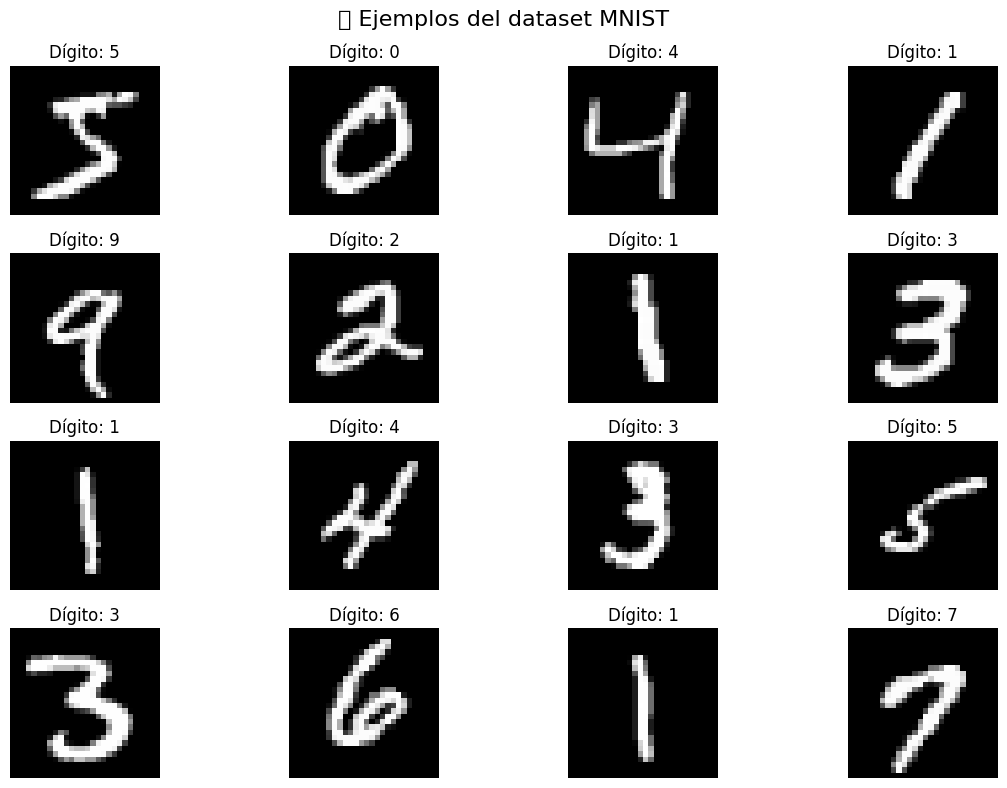

In [3]:
# ¡Veamos algunas imágenes de ejemplo!
plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Dígito: {y_train[i]}')
    plt.axis('off')

plt.suptitle('🖼️ Ejemplos del dataset MNIST', fontsize=16)
plt.tight_layout()
plt.show()

## 🔧 Paso 3: Preparar los datos

Necesitamos \"normalizar\" los datos para que la red neuronal aprenda mejor:
- **Normalizar píxeles**: Cambiar valores de 0-255 a 0-1
- **Aplanar imágenes**: Convertir matriz 28x28 a vector de 784 elementos

In [4]:
# Normalizar los píxeles: de 0-255 a 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Aplanar las imágenes: de 28x28 a 784
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("🔄 Datos preparados:")
print(f"   - Forma de datos de entrenamiento: {x_train_flat.shape}")
print(f"   - Forma de datos de prueba: {x_test_flat.shape}")
print(f"   - Rango de valores: {x_train_flat.min():.1f} - {x_train_flat.max():.1f}")
print(f"   - Número de clases (dígitos): {len(np.unique(y_train))}")

🔄 Datos preparados:
   - Forma de datos de entrenamiento: (60000, 784)
   - Forma de datos de prueba: (10000, 784)
   - Rango de valores: 0.0 - 1.0
   - Número de clases (dígitos): 10


## 🧠 Paso 4: Crear la Red Neuronal

Vamos a crear una red neuronal simple pero poderosa:
- **Capa de entrada**: 784 neuronas (una por cada píxel)
- **Capa oculta**: 128 neuronas con función ReLU
- **Capa de salida**: 10 neuronas (una por cada dígito 0-9)

In [5]:
# Crear el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Capa oculta
    keras.layers.Dropout(0.2),  # Previene sobreajuste
    keras.layers.Dense(10, activation='softmax')  # Capa de salida
])

# Configurar el modelo
model.compile(
    optimizer='adam',           # Optimizador eficiente
    loss='sparse_categorical_crossentropy',  # Para clasificación
    metrics=['accuracy']        # Queremos ver la precisión
)

# Ver el resumen del modelo
print("🏗️ Arquitectura de la Red Neuronal:")
model.summary()

🏗️ Arquitectura de la Red Neuronal:


/home/julihocc/mnist/mnist/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-19 15:23:39.094013: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## 🏃‍♂️ Paso 5: Entrenar la Red Neuronal

¡Hora de entrenar! La red aprenderá a reconocer patrones en los dígitos.
Usaremos solo 5 épocas para que sea rápido pero efectivo.

In [6]:
# ¡Entrenar la red neuronal!
print("🚀 Comenzando el entrenamiento...")
print("📊 Verás cómo mejora la precisión en cada época\n")

history = model.fit(
    x_train_flat, y_train,      # Datos de entrenamiento
    epochs=5,                   # 5 rondas de entrenamiento
    batch_size=128,             # Procesar 128 imágenes a la vez
    validation_split=0.1,       # Usar 10% para validación
    verbose=1                   # Mostrar progreso
)

print("\n✅ ¡Entrenamiento completado!")

🚀 Comenzando el entrenamiento...
📊 Verás cómo mejora la precisión en cada época

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8790 - loss: 0.4217 - val_accuracy: 0.9573 - val_loss: 0.1661
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9421 - loss: 0.2014 - val_accuracy: 0.9680 - val_loss: 0.1157
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9548 - loss: 0.1532 - val_accuracy: 0.9727 - val_loss: 0.0979
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9627 - loss: 0.1255 - val_accuracy: 0.9760 - val_loss: 0.0865
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9681 - loss: 0.1069 - val_accuracy: 0.9783 - val_loss: 0.0810

✅ ¡Entrenamiento completado!


## 📊 Paso 6: Evaluar el Modelo

¡Veamos qué tan bien funciona nuestra red neuronal!

In [7]:
# Evaluar en datos de prueba
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)

print("🎯 Resultados finales:")
print(f"   📈 Precisión en datos de prueba: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   📉 Pérdida en datos de prueba: {test_loss:.4f}")

if test_accuracy > 0.95:
    print("🎉 ¡Excelente! La red tiene más del 95% de precisión")
elif test_accuracy > 0.90:
    print("👍 ¡Muy bien! La red tiene más del 90% de precisión")
else:
    print("📚 La red necesita más entrenamiento")

🎯 Resultados finales:
   📈 Precisión en datos de prueba: 0.9733 (97.33%)
   📉 Pérdida en datos de prueba: 0.0904
🎉 ¡Excelente! La red tiene más del 95% de precisión


/tmp/ipykernel_10816/3005856730.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10816/3005856730.py:24: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/julihocc/mnist/mnist/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/julihocc/mnist/mnist/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


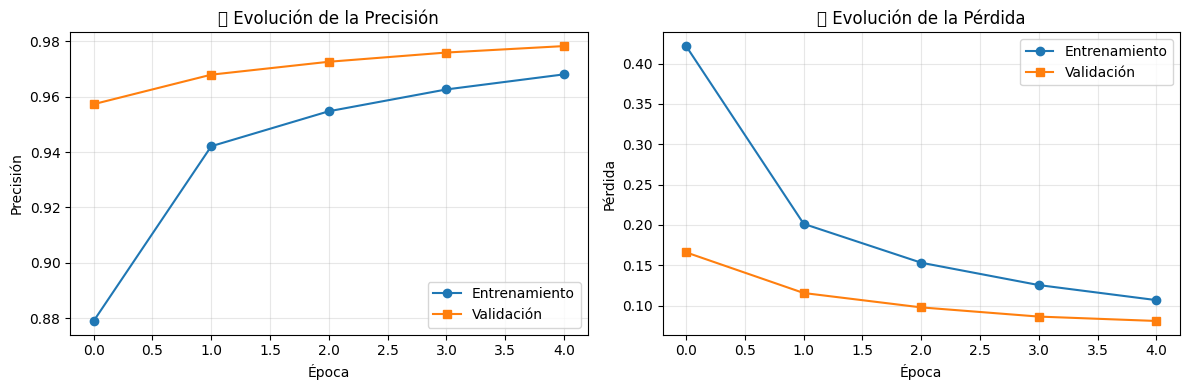

In [8]:
# Gráfico del progreso de entrenamiento
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento', marker='o')
plt.plot(history.history['val_accuracy'], label='Validación', marker='s')
plt.title('📈 Evolución de la Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento', marker='o')
plt.plot(history.history['val_loss'], label='Validación', marker='s')
plt.title('📉 Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🔮 Paso 7: ¡Hacer Predicciones!

Veamos cómo nuestra red neuronal predice algunos dígitos:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/tmp/ipykernel_10816/2334658597.py:20: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/julihocc/mnist/mnist/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


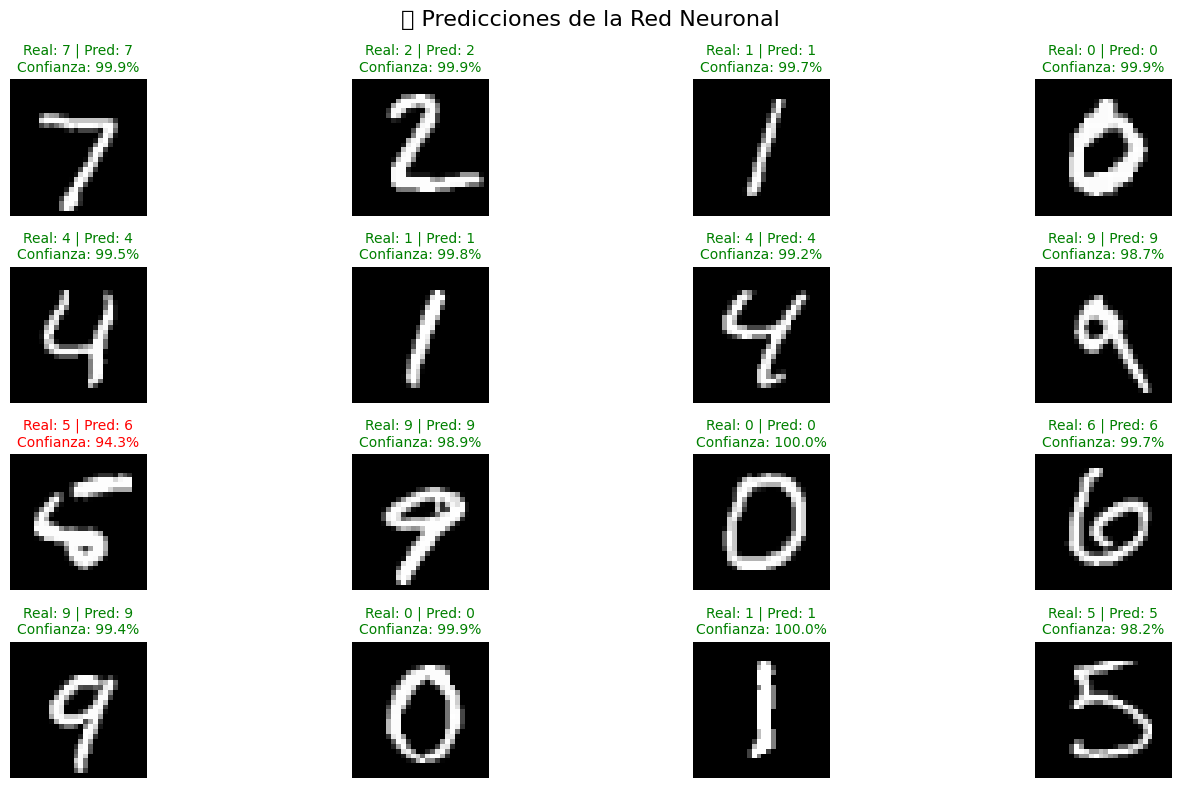

✅ Aciertos: 15/16 (93.8%)
❌ Errores: 1/16 (6.2%)


In [9]:
# Hacer predicciones en algunas imágenes de prueba
predictions = model.predict(x_test_flat[:16])
predicted_classes = np.argmax(predictions, axis=1)

# Mostrar las predicciones
plt.figure(figsize=(15, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[i], cmap='gray')
    
    # Color verde si es correcto, rojo si es incorrecto
    color = 'green' if predicted_classes[i] == y_test[i] else 'red'
    confidence = np.max(predictions[i]) * 100
    
    plt.title(f'Real: {y_test[i]} | Pred: {predicted_classes[i]}\nConfianza: {confidence:.1f}%', 
              color=color, fontsize=10)
    plt.axis('off')

plt.suptitle('🎯 Predicciones de la Red Neuronal', fontsize=16)
plt.tight_layout()
plt.show()

# Contar aciertos y errores
correct = sum(predicted_classes == y_test[:16])
print(f"✅ Aciertos: {correct}/16 ({correct/16*100:.1f}%)")
print(f"❌ Errores: {16-correct}/16 ({(16-correct)/16*100:.1f}%)")

## 🎉 ¡Felicidades!

Has creado tu primera red neuronal que puede reconocer dígitos escritos a mano con más del 95% de precisión.

### 🔍 ¿Qué aprendimos?
1. **Carga de datos**: Cómo descargar y explorar el dataset MNIST
2. **Preprocesamiento**: Normalización y reshape de datos
3. **Arquitectura**: Cómo diseñar una red neuronal simple
4. **Entrenamiento**: Cómo entrenar el modelo
5. **Evaluación**: Cómo medir el rendimiento
6. **Predicciones**: Cómo usar el modelo entrenado

### 🚀 Próximos pasos para explorar:
- Experimenta con más capas ocultas
- Prueba diferentes funciones de activación
- Aumenta el número de épocas
- Explora redes convolucionales (CNN) para mejores resultados
- ¡Dibuja tus propios dígitos y prueba si la red los reconoce!

### 💡 Recuerda:
Esta red neuronal simple tiene **más de 100,000 parámetros** y puede aprender patrones complejos. ¡La IA está en todas partes y tú ya sabes cómo funciona por dentro!

## 🛠️ Bonus: Función interactiva para probar tu propio dígito

¡Dibuja un dígito y ve si la red lo reconoce! (Opcional, para explorar después del taller)

🎮 Puedes cambiar el número dentro de los paréntesis para probar diferentes dígitos:
   probar_digito(0)   # Prueba el primer dígito
   probar_digito(100) # Prueba el dígito en posición 100
   probar_digito(500) # Prueba el dígito en posición 500
\n¡Intenta con diferentes números!


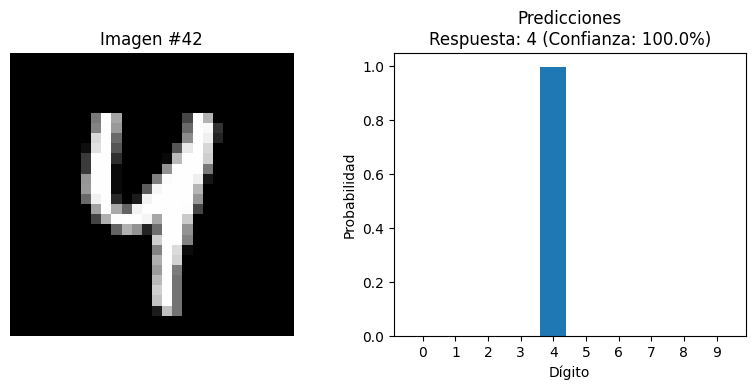

🔍 Imagen #42:
   📝 Dígito real: 4
   🤖 Predicción: 4
   💯 Confianza: 100.0%
   ✅ ¡Correcto!


In [10]:
# Función para probar con un dígito específico del dataset
def probar_digito(indice=0):
    """Prueba la predicción con un dígito específico del dataset de prueba"""
    
    # Tomar una imagen del dataset de prueba
    imagen = x_test[indice]
    imagen_flat = x_test_flat[indice:indice+1]  # Formato para el modelo
    
    # Hacer predicción
    prediccion = model.predict(imagen_flat, verbose=0)
    clase_predicha = np.argmax(prediccion)
    confianza = np.max(prediccion) * 100
    
    # Mostrar resultado
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(imagen, cmap='gray')
    plt.title(f'Imagen #{indice}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.bar(range(10), prediccion[0])
    plt.title(f'Predicciones\nRespuesta: {clase_predicha} (Confianza: {confianza:.1f}%)')
    plt.xlabel('Dígito')
    plt.ylabel('Probabilidad')
    plt.xticks(range(10))
    
    plt.tight_layout()
    plt.show()
    
    print(f"🔍 Imagen #{indice}:")
    print(f"   📝 Dígito real: {y_test[indice]}")
    print(f"   🤖 Predicción: {clase_predicha}")
    print(f"   💯 Confianza: {confianza:.1f}%")
    
    if clase_predicha == y_test[indice]:
        print("   ✅ ¡Correcto!")
    else:
        print("   ❌ Incorrecto")

# Probar con algunos ejemplos
print("🎮 Puedes cambiar el número dentro de los paréntesis para probar diferentes dígitos:")
print("   probar_digito(0)   # Prueba el primer dígito")
print("   probar_digito(100) # Prueba el dígito en posición 100")
print("   probar_digito(500) # Prueba el dígito en posición 500")
print("\\n¡Intenta con diferentes números!")

# Ejemplo
probar_digito(42)  # Prueba con el dígito en posición 42